# **Xây dựng mô hình để phát hiện bệnh viêm gan C** ✌✌
nhóm 22
---



#Cài đặt thư viện và kết nối Drive


In [ ]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.preprocessing import StandardScaler


In [ ]:
#connect drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd # kết nối drive của bản thân

try:
    hepatitisC_df = pd.read_csv("/content/drive/MyDrive/Đồ án Máy Học Lần 2/HepatitisC  Liver.csv", index_col="Unnamed: 0")
    df = hepatitisC_df.copy()
    print("Đã tải tệp thành công!")
except FileNotFoundError:
    print("Error: Không tìm thấy tệp. Vui lòng đảm bảo rằng đường dẫn và tên tệp là chính xác.") # nếu có lỗi với flie sẽ hiển thị đoạn này


Đã tải tệp thành công!


# Hiển thị thông tin cơ bản của dữ liệu

In [ ]:
print(df.head())  # Hiển thị 5 dòng đầu

        Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA  \
1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0   
2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0   
3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0   
4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0   
5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0   

    GGT  PROT  
1  12.1  69.0  
2  15.6  76.5  
3  33.2  79.3  
4  33.8  75.7  
5  29.9  68.7  


In [ ]:
print(df.shape)   # Kích thước dữ liệu

(615, 13)


In [ ]:
print(df.info())  # Thông tin về các cột và kiểu dữ liệu

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 67.3+ KB
None


In [ ]:
print(df.describe())  # Thống kê mô tả cho các cột số

              Age         ALB         ALP         ALT         AST         BIL  \
count  615.000000  614.000000  597.000000  614.000000  615.000000  615.000000   
mean    47.408130   41.620195   68.283920   28.450814   34.786341   11.396748   
std     10.055105    5.780629   26.028315   25.469689   33.090690   19.673150   
min     19.000000   14.900000   11.300000    0.900000   10.600000    0.800000   
25%     39.000000   38.800000   52.500000   16.400000   21.600000    5.300000   
50%     47.000000   41.950000   66.200000   23.000000   25.900000    7.300000   
75%     54.000000   45.200000   80.100000   33.075000   32.900000   11.200000   
max     77.000000   82.200000  416.600000  325.300000  324.000000  254.000000   

              CHE        CHOL         CREA         GGT        PROT  
count  615.000000  605.000000   615.000000  615.000000  614.000000  
mean     8.196634    5.368099    81.287805   39.533171   72.044137  
std      2.205657    1.132728    49.756166   54.661071    5.402

In [ ]:
print(df.describe(include='object'))  # Thống kê mô tả cho các cột dạng chuỗi

             Category  Sex
count             615  615
unique              5    2
top     0=Blood Donor    m
freq              533  377


#Khám phá dữ liệu bằng biểu đồ

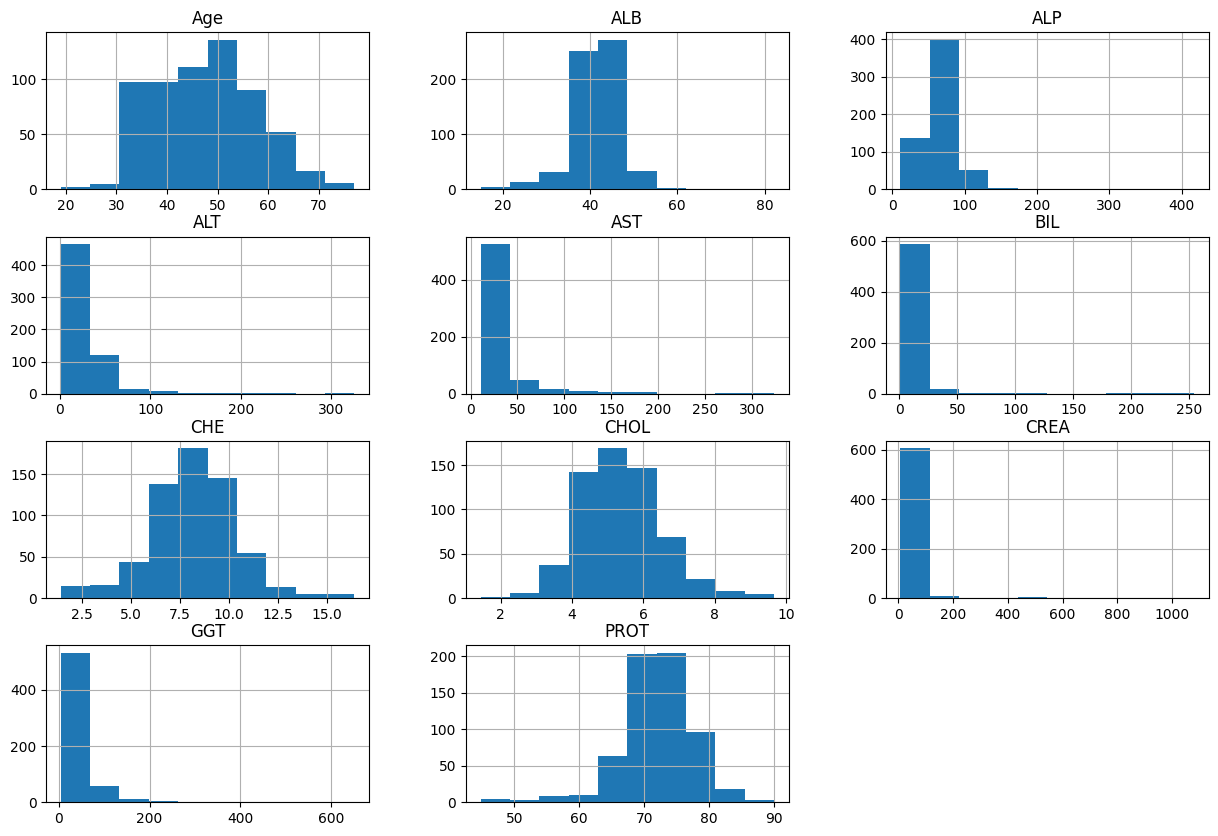

In [ ]:
# Khám phá dữ liệu bằng biểu đồ
# Biểu đồ phân bố của các biến số
df.hist(figsize=(15, 10))
plt.show()

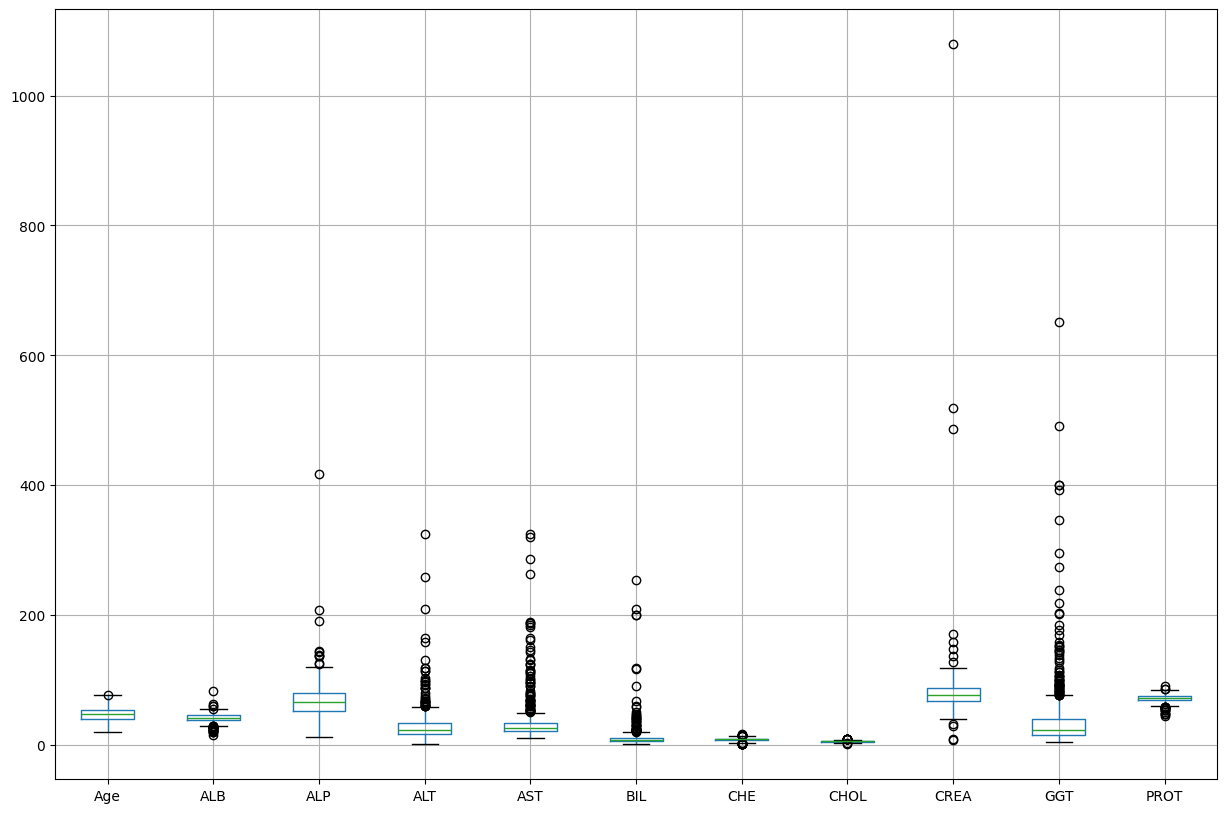

In [ ]:
# Biểu đồ hộp để xem xét ngoại lệ
df.boxplot(figsize=(15, 10))
plt.show()
#hiển thị sự phân bố của các giá trị cho các đặc trưng khác nhau trong tập dữ liệu


GGT và PROT có giá trị cao hơn nhiều so với những đặc trưng khác như ALB và ALP.  có một số giá trị ngoại lệ (outlier) cho một số đặc trưng, được chỉ ra bằng các điểm nằm ngoài phần râu của các hộp.Kích thước của các hộp khác nhau, cho thấy sự khác biệt trong độ phân tán hoặc phân bố của các giá trị cho mỗi đặc trưng.Các giá trị trung vị được hiển thị bằng các đường ngang bên trong các hộp.

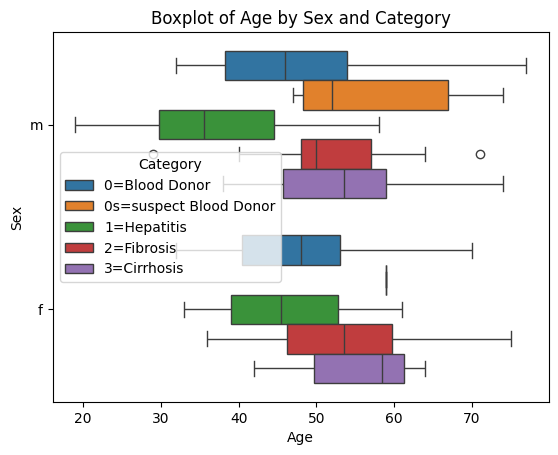

In [ ]:
sns.boxplot(data=df, x='Age', y='Sex', hue='Category')
plt.title('Boxplot of Age by Sex and Category')
plt.show()



1.   Độ tuổi trung bình của những người thuộc nhóm "Blood Donor" (0) có vẻ cao hơn so với các nhóm khác
2.   Phân bố độ tuổi của nhóm "suspect Blood Donor" (0s) tương đối rộng, cho thấy độ tuổi của những người trong nhóm này khá đa dạng.
3. Nhóm "Hepatitis" (1) có độ tuổi tương đối thấp hơn so với các nhóm khác.
4. Nhóm "Fibrosis" (2) và "Cirrhosis" (3) có độ tuổi cao hơn so với các nhóm khác.
5. Nhìn chung, có sự khác biệt rõ rệt về phân bố độ tuổi giữa các nhóm phân loại.


*Biểu đồ này cung cấp một cái nhìn tổng quan về sự khác biệt về độ tuổi giữa các nhóm phân loại dựa trên giới tính và các đặc điểm y khoa khác. Điều này có thể hữu ích trong việc phân tích và so sánh các nhóm đối tượng trong nghiên cứu y tế.










<ipython-input-57-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

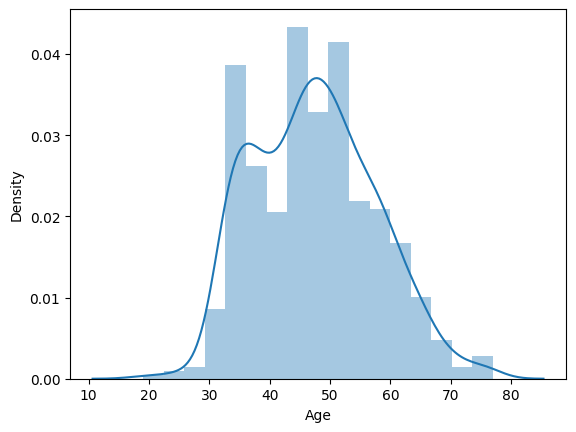

In [ ]:
sns.distplot(df['Age'])

# Xử Lý Dữ Liệu


In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Đồ án Máy Học Lần 2/HepatitisC  Liver (đã edit).csv')
#chỉnh bằng tay

In [ ]:
# Chuyển đổi cột 'Category' và 'Sex' thành số bằng cách sử dụng pd.to_numeric
data['Category'] = pd.to_numeric(data['Category'].replace(
    {'Blood Donor': 0, 'suspect Blood Donor': 1, 'Hepatitis': 2, 'Fibrosis': 3, 'Cirrhosis': 4}),
    errors='coerce')

<ipython-input-6-9d7e2272a63d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Category'] = pd.to_numeric(data['Category'].replace(


In [ ]:
# Chuyển cột 'Sex' thành boolean (0 cho 'M' và 1 cho 'F')
data['Sex'] = data['Sex'].replace({'M': 0, 'F': 1}).astype(bool)


In [ ]:
# Điền giá trị NaN còn lại vào tất cả các cột bằng giá trị trung bình của cột
data.fillna(data.mean(), inplace=True)

In [ ]:
# Các tính năng và nhãn riêng biệt
X = data.drop('Category', axis=1)  # 'Category' làm cột mục tiêu
y = data['Category']

In [ ]:
# Chuẩn hóa các tính năng
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Xáo trộn và chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)

#Xây Dựng Mô Hình

# Trường hợp 1 Support Vector Machine (SVM)


In [ ]:
# thuật toán SVM
from sklearn.svm import SVC

# Khởi tạo mô hình SVM
svm_model = SVC(kernel='linear', random_state=42)  # Sử dụng kernel tuyến tính
9

In [ ]:
# Huấn luyện mô hình trên tập huấn luyện
svm_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện
y_pred_train_svm = svm_model.predict(X_train)

# Đánh giá mô hình trên tập huấn luyện
accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
confusion_mat_train_svm = confusion_matrix(y_train, y_pred_train_svm)
classification_rep_train_svm = classification_report(y_train, y_pred_train_svm)

print("\nSVM (Train) - Accuracy (%):", accuracy_train_svm * 100,"%")
print("SVM (Train) - Confusion Matrix:\n", confusion_mat_train_svm)
print("SVM (Train) - Classification Report:\n", classification_rep_train_svm)



SVM (Train) - Accuracy (%): 98.57723577235772 %
SVM (Train) - Confusion Matrix:
 [[437   0   0   0   0]
 [  0   4   0   0   0]
 [  0   0  12   3   0]
 [  0   0   2  13   0]
 [  0   0   0   2  19]]
SVM (Train) - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       437
           1       1.00      1.00      1.00         4
           2       0.86      0.80      0.83        15
           3       0.72      0.87      0.79        15
           4       1.00      0.90      0.95        21

    accuracy                           0.99       492
   macro avg       0.92      0.91      0.91       492
weighted avg       0.99      0.99      0.99       492



In [ ]:
# Huấn luyện mô hình trên các tập
svm_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test)

# Đánh giá mô hình
accuracy_svm = accuracy_score(y_test, y_pred_svm)
confusion_mat_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print("\nSVM (test)- Accuracy(%):", accuracy_svm * 100,"%")
print("SVM (test)- Confusion Matrix:\n", confusion_mat_svm)
print("SVM (test)- Classification Report:\n", classification_rep_svm)




SVM (test)- Accuracy(%): 90.2439024390244 %
SVM (test)- Confusion Matrix:
 [[96  0  0  0  0]
 [ 0  2  0  1  0]
 [ 0  0  6  3  0]
 [ 1  0  1  4  0]
 [ 1  1  3  1  3]]
SVM (test)- Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       0.67      0.67      0.67         3
           2       0.60      0.67      0.63         9
           3       0.44      0.67      0.53         6
           4       1.00      0.33      0.50         9

    accuracy                           0.90       123
   macro avg       0.74      0.67      0.66       123
weighted avg       0.92      0.90      0.90       123



#Trường hợp 2 DecisionTree (cây quyết định)

In [ ]:
# Khởi tạo mô hình cây quyết định
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
decision_tree_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện
y_pred_train_dt = decision_tree_model.predict(X_train)

# Đánh giá mô hình trên tập huấn luyện
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
confusion_mat_train_dt = confusion_matrix(y_train, y_pred_train_dt)
classification_rep_train_dt = classification_report(y_train, y_pred_train_dt)
print("\nCây Quyết Định (Train) - Accuracy (%):", accuracy_train_dt * 100,"%")
print("Cây Quyết Định (Train) - Confusion Matrix:\n", confusion_mat_train_dt)
print("Cây Quyết Định (Train) - Classification Report:\n", classification_rep_train_dt)



Cây Quyết Định (Train) - Accuracy (%): 100.0 %
Cây Quyết Định (Train) - Confusion Matrix:
 [[437   0   0   0   0]
 [  0   4   0   0   0]
 [  0   0  15   0   0]
 [  0   0   0  15   0]
 [  0   0   0   0  21]]
Cây Quyết Định (Train) - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       437
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        21

    accuracy                           1.00       492
   macro avg       1.00      1.00      1.00       492
weighted avg       1.00      1.00      1.00       492



In [ ]:
# Dự đoán trên tập kiểm tra
y_pred_dt = decision_tree_model.predict(X_test)

# Đánh giá mô hình
accuracy_dt = accuracy_score(y_test, y_pred_dt)
confusion_mat_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print("\nCây Quyết Định (test)- Accuracy(%):", accuracy_dt * 100,"%")
print("Cây Quyết Định (test) - Confusion Matrix:\n", confusion_mat_dt)
print("Cây Quyết Định (test) - Classification Report:\n", classification_rep_dt)


Cây Quyết Định (test)- Accuracy(%): 99.1869918699187 %
Cây Quyết Định (test) - Confusion Matrix:
 [[96  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  1  8]]
Cây Quyết Định (test) - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         9
           3       0.86      1.00      0.92         6
           4       1.00      0.89      0.94         9

    accuracy                           0.99       123
   macro avg       0.97      0.98      0.97       123
weighted avg       0.99      0.99      0.99       123



# Trường hợp 3 Random Forest

In [ ]:
# Khởi tạo mô hình Random Forest
random_forest_model = RandomForestClassifier(random_state=42, n_estimators= 100)

# Huấn luyện mô hình trên tập huấn luyện
random_forest_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện
y_pred_train_rf = random_forest_model.predict(X_train)

# Đánh giá mô hình trên tập huấn luyện
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
confusion_mat_train_rf = confusion_matrix(y_train, y_pred_train_rf)
classification_rep_train_rf = classification_report(y_train, y_pred_train_rf)

print("\nRandom Forest (Train) - Accuracy (%):", accuracy_train_rf * 100,"%")
print("Random Forest (Train) - Confusion Matrix:\n", confusion_mat_train_rf)
print("Random Forest (Train) - Classification Report:\n", classification_rep_train_rf)


Random Forest (Train) - Accuracy (%): 100.0 %
Random Forest (Train) - Confusion Matrix:
 [[437   0   0   0   0]
 [  0   4   0   0   0]
 [  0   0  15   0   0]
 [  0   0   0  15   0]
 [  0   0   0   0  21]]
Random Forest (Train) - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       437
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        21

    accuracy                           1.00       492
   macro avg       1.00      1.00      1.00       492
weighted avg       1.00      1.00      1.00       492



In [ ]:
# Dự đoán trên tập kiểm tra
y_pred_rf = random_forest_model.predict(X_test)

# Đánh giá mô hình
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("\nRandom Forest (test)- Accuracy(%):", accuracy_rf * 100,"%")
print("Random Forest (test) - Confusion Matrix:\n", confusion_mat_rf)
print("Random Forest (test) - Classification Report:\n", classification_rep_rf)


Random Forest (test)- Accuracy(%): 95.1219512195122 %
Random Forest (test) - Confusion Matrix:
 [[96  0  0  0  0]
 [ 1  1  1  0  0]
 [ 0  0  8  1  0]
 [ 0  0  1  5  0]
 [ 0  0  0  2  7]]
Random Forest (test) - Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.33      0.50         3
           2       0.80      0.89      0.84         9
           3       0.62      0.83      0.71         6
           4       1.00      0.78      0.88         9

    accuracy                           0.95       123
   macro avg       0.88      0.77      0.79       123
weighted avg       0.96      0.95      0.95       123

